### 평균 경로 길이(평균 최단 경로 길이) 계산

In [1]:
import networkx as nx

1

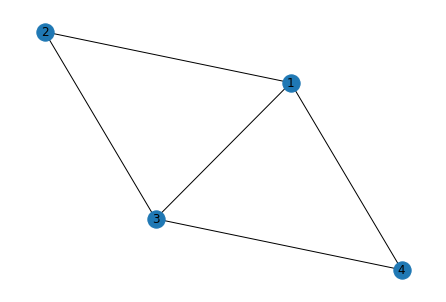

In [199]:
# 가중치가 없는 네트워크

g = nx.Graph()
g.add_nodes_from([1,2,3,4])
g.add_edges_from([(1,2),(2,3),(1,3),(1,4)])
g.add_edge(3,4)
nx.draw(g, with_labels = True)
nx.radius(g)

In [48]:
nx.has_path(g,3,4)

True

In [47]:
list(nx.all_simple_paths(g,3,4)) # 노드 3에서 노드 4로 가는 모든 경로

[[3, 2, 1, 4], [3, 1, 4], [3, 4]]

In [46]:
nx.shortest_path(g,3,4) # 노드 3에서 노드 4로 가는 최단 경로

[3, 4]

In [45]:
nx.shortest_path_length(g,3,4) # 노드 3에서 노드 4로 가는 최단 경로 길이

1

In [200]:
nx.shortest_path(g) # 모든 경로 확인

{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4]},
 2: {2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 1, 4]},
 3: {3: [3], 2: [3, 2], 1: [3, 1], 4: [3, 4]},
 4: {4: [4], 1: [4, 1], 3: [4, 3], 2: [4, 1, 2]}}

In [14]:
nx.shortest_path_length(g)

<generator object all_pairs_shortest_path_length at 0x0000025E20265580>

In [43]:
nx.average_shortest_path_length(g) # g의 평균 최단 경로 길이

1.1666666666666667

-0.40824829046386546

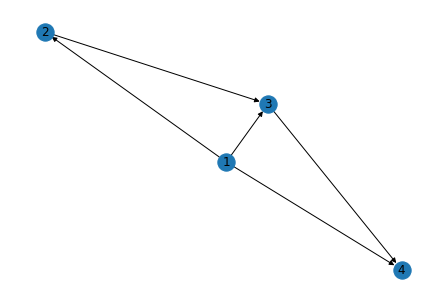

In [72]:
# 가중치가 있는 방향성 네트워크

w = nx.DiGraph() 
w.add_nodes_from([1,2,3,4])
w.add_edge(1,2, weight = 3)
w.add_edge(2,3, weight = 1) 
w.add_edge(1,3, weight = 5)
w.add_edge(1,4, weight = 4)
w.add_edge(3,4, weight = 2)
nx.draw(w, with_labels = True )
nx.degree_assortativity_coefficient(w) # 동류성 계수

In [35]:
nx.has_path(w,3,4)

False

In [41]:
print(nx.shortest_path_length(w,2,4))
print(nx.shortest_path_length(w,2,4,'weight'))

2
3


In [36]:
nx.average_shortest_path_length(w) 

0.3333333333333333

-1.0


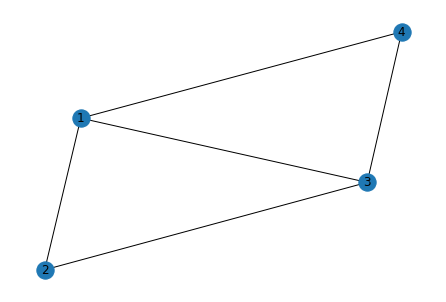

In [82]:
import scipy.stats

nx.draw(g, with_labels = True)
knn_dict = nx.average_degree_connectivity(g)
k,knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)
print(r)

In [77]:
nx.draw(w, with_labels = True)
knn_dict = nx.average_degree_connectivity(w)
k,knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)
print(r)

1.0

1.0

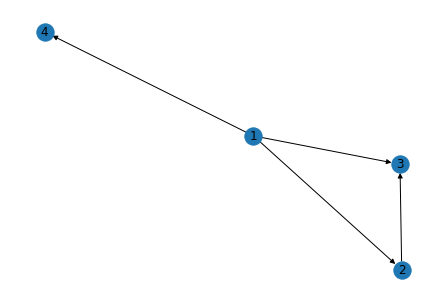

In [4]:
# 가중치가 있는 방향성 네트워크

f = nx.DiGraph() 
f.add_nodes_from([1,2,3,4])
f.add_edge(1,2, weight = 3)
f.add_edge(2,3, weight = 1) 
f.add_edge(1,3, weight = 5)
f.add_edge(1,4, weight = 4)
nx.draw(f, with_labels = True)
nx.average_shortest_path_length(f,'weight')

### 연결상태와 덩어리

In [7]:
import networkx as nx

k4 = nx.complete_graph(4)
print(nx.is_connected(k4))

True


False

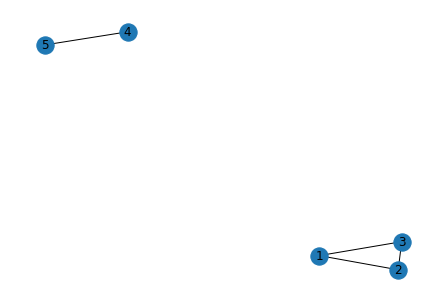

In [10]:
g = nx.Graph()

nx.add_cycle(g,[1,2,3])
g.add_edge(4,5)

nx.draw(g, with_labels = True)
nx.is_connected(g)

In [15]:
comps = sorted(nx.connected_components(g),key=len, reverse=True)
nodes_in_giant_comp = comps[0]
gc = nx.subgraph(g, nodes_in_giant_comp)
nx.is_connected(gc)

True

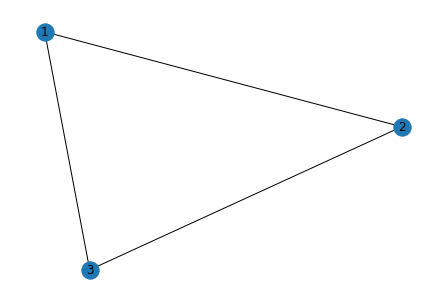

In [16]:
core_nodes = max(nx.connected_components(g), key = len)
core = g.subgraph(core_nodes)

nx.draw(core, with_labels = True)

### Directed paths & components

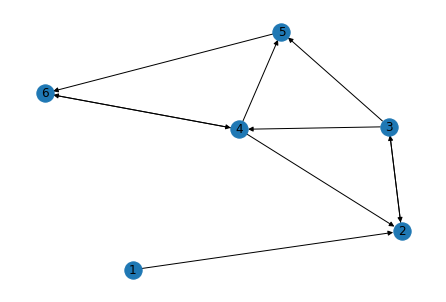

In [18]:
d = nx.DiGraph()
d.add_edges_from([
    (1,2),
    (2,3),
    (3,2),(3,4),(3,5),
    (4,2),(4,5),(4,6),
    (5,6),
    (6,4)
    ])

nx.draw(d, with_labels = True)

In [19]:
nx.has_path(d,1,4)

True

In [20]:
nx.has_path(d,4,1)

False

In [22]:
nx.shortest_path(d)

{1: {1: [1],
  2: [1, 2],
  3: [1, 2, 3],
  4: [1, 2, 3, 4],
  5: [1, 2, 3, 5],
  6: [1, 2, 3, 4, 6]},
 2: {2: [2], 3: [2, 3], 4: [2, 3, 4], 5: [2, 3, 5], 6: [2, 3, 4, 6]},
 3: {3: [3], 2: [3, 2], 4: [3, 4], 5: [3, 5], 6: [3, 4, 6]},
 4: {4: [4], 2: [4, 2], 5: [4, 5], 6: [4, 6], 3: [4, 2, 3]},
 5: {5: [5], 6: [5, 6], 4: [5, 6, 4], 2: [5, 6, 4, 2], 3: [5, 6, 4, 2, 3]},
 6: {6: [6], 4: [6, 4], 2: [6, 4, 2], 5: [6, 4, 5], 3: [6, 4, 2, 3]}}

In [24]:
nx.is_strongly_connected(d)

False

In [25]:
nx.is_weakly_connected(d)

True

In [26]:
list(nx.weakly_connected_components(d))

[{1, 2, 3, 4, 5, 6}]

In [27]:
list(nx.strongly_connected_components(d))

[{2, 3, 4, 5, 6}, {1}]

### 트리

In [28]:
k4 = nx.complete_graph(4)
nx.is_tree(k4)

False

In [29]:
p = nx.path_graph(4)
nx.is_tree(p)

True

### 삼각구조

In [32]:
nx.triangles(g) # 노드의 딕셔너리 -> 삼각구조 개수  

{1: 1, 2: 1, 3: 1, 4: 0, 5: 0}

In [34]:
nx.clustering(g) # 노드의 딕셔너리 -> 뭉침 계수

{1: 1.0, 2: 1.0, 3: 1.0, 4: 0, 5: 0}

In [35]:
nx.average_clustering(g) # 네트워크의 뭉침 계수

0.6

## 문제 2.41

In [36]:
import networkx as nx

In [6]:
G = nx.read_edgelist('socfb-Northwestern25.edges.gz')

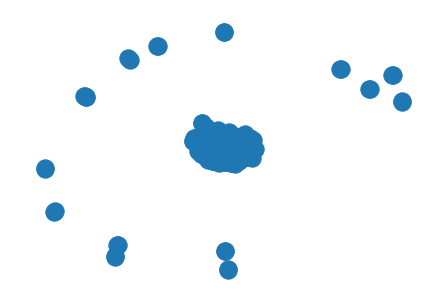

In [42]:
nx.draw(G)

In [43]:
G.number_of_edges()

488337

In [44]:
G.number_of_nodes()

10567

In [46]:
nx.is_connected(d)

NetworkXNotImplemented: not implemented for directed type

In [48]:
nx.is_weakly_connected(d) # 약하게 연결된 네트워크

True

In [49]:
nx.density(G) # 조밀도

0.008747567709293077

In [52]:
nx.degree_assortativity_coefficient(G) # 동류성 계수

0.03444129080711028

In [57]:
nx.average_clustering(G) # 뭉침 계수

0.2379913948280604

In [10]:
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np

a = []
b = []

for i in range(0,100):
    for j in range(1):
       a.append(random.sample(G.nodes,2))
    b.append(nx.shortest_path_length(G,a[i][0],a[i][1]))
print(min(b)) # 최단 경로 길이
print(max(b)) # 지름
print(np.mean(b)) # 표본의 평균

1
4
2.82


## 문제 2.23

5

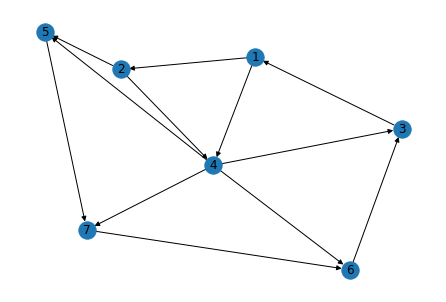

In [3]:
import networkx as nx
 
w = nx.DiGraph() 
w.add_nodes_from([1,2,3,4,5,6,7])
w.add_edge(1,2)
w.add_edge(1,4)
w.add_edge(2,4) 
w.add_edge(2,5)
w.add_edge(3,1)
w.add_edge(4,3)
w.add_edge(4,5)
w.add_edge(4,6)
w.add_edge(4,7)
w.add_edge(5,7)
w.add_edge(6,3)
w.add_edge(7,6)

nx.draw(w, with_labels = True )
nx.diameter(w)

### 문제 2.4

In [1]:
import networkx as nx

True

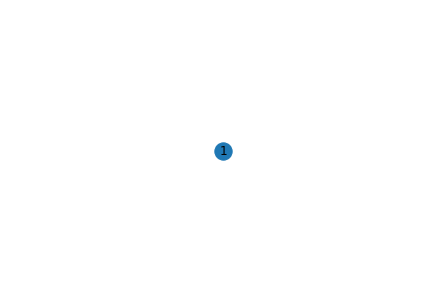

In [4]:
a = nx.Graph()
a.add_node(1)

nx.draw(a, with_labels = True)
nx.is_connected(a)

### 문제 2.8 ~ 2.10

True


[('e', 'f'), ('f', 'e')]

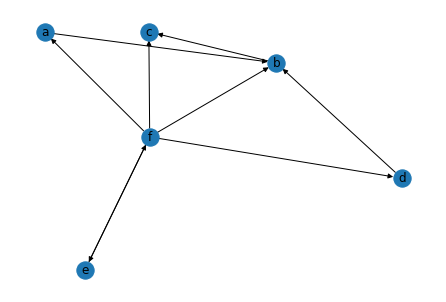

In [20]:
f = nx.DiGraph()
f.add_nodes_from(['a','b','c','d','e','f'])
f.add_edge('a','b', weight = 1)
f.add_edge('b','c', weight = 2) 
f.add_edge('d','b', weight = 1)
f.add_edge('d','b', weight = 1)
f.add_edge('e','f', weight = 1)
f.add_edge('f','a', weight = 2)
f.add_edge('f','b', weight = 1)
f.add_edge('f','c', weight = 3)
f.add_edge('f','d', weight = 1)
f.add_edge('f','e', weight = 1)
nx.draw(f, with_labels = True)

print(nx.is_weakly_connected(f))
nx.find_cycle(f)


False


2

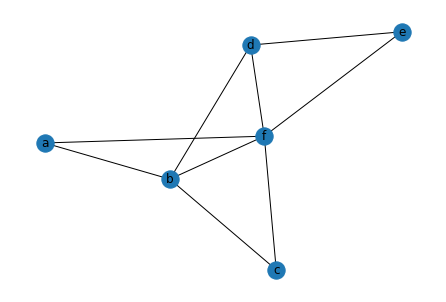

In [21]:
f = nx.Graph()
f.add_nodes_from(['a','b','c','d','e','f'])
f.add_edges_from([('a','b'),('b','c'),('d','b'),('d','e'),('e','f'),('f','a'),('f','b'),('f','c'),('f','d')])

nx.draw(f, with_labels = True)
print(nx.is_tree(f))
nx.diameter(f)

### 문제 2.13 - 2.15

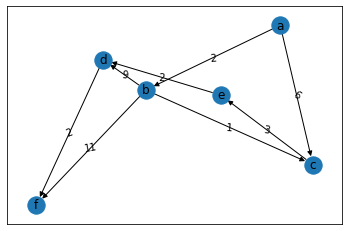

In [70]:
c = nx.DiGraph()
c.add_nodes_from(['a','b','c','d','e','f'])
c.add_weighted_edges_from([('a','b',2),
                           ('a','c',6),
                           ('b','c',1),
                           ('b','d',9),
                           ('b','f',11),
                           ('c','e',3),
                           ('d','f',2),
                           ('e','d',2)
                           ])

pos = nx.spring_layout(c)

labels = nx.get_edge_attributes(c, 'weight')
nx.draw_networkx_edge_labels(c,pos, edge_labels=labels)
nx.draw_networkx(c,pos)

In [43]:
print(nx.is_strongly_connected(c), nx.is_weakly_connected(c))

False True


In [45]:
print(c.in_degree('d', weight = 'weight'), c.out_degree('d', weight = 'weight'))

11 2


1

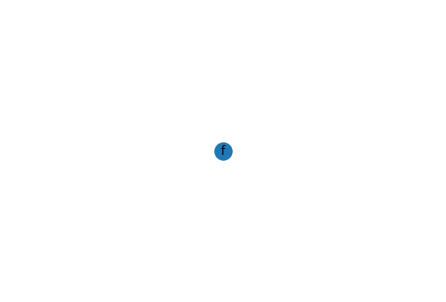

In [46]:
comps = sorted(nx.strongly_connected_components(c), key = len, reverse=True) # 덩어리 크기 기준, 내림차순 정렬
giant_comp = comps[0]
gc = nx.subgraph(c, giant_comp)
nx.draw(gc, with_labels = True)

nx.number_of_nodes(gc)

### 문제 2.16 - 2.18

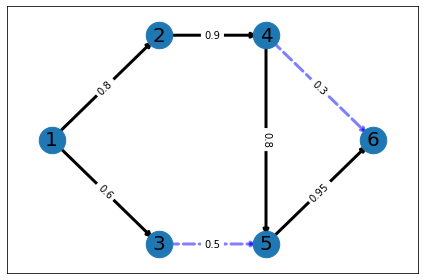

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

d = nx.DiGraph()

d.add_nodes_from([1,2,3,4,5,6])

d.add_weighted_edges_from([(1,2,0.8),
                           (1,3,0.6),
                           (2,4,0.9),
                           (3,5,0.5),
                           (4,5,0.8),
                           (4,6,0.3),
                           (5,6,0.95)
                           ])

fixed_layout = {1:[0,0.5],
                2:[1,1],
                3:[1,0],
                4:[2,1],
                5:[2,0],
                6:[3,0.5]}

large = [(u,v) for (u,v,d) in d.edges(data = True) if d['weight'] > 0.5]
small = [(u,v) for (u,v,d) in d.edges(data = True) if d['weight'] <= 0.5]

# node
nx.draw_networkx_nodes(d, pos = fixed_layout, node_size=700)

# edge
nx.draw_networkx_edges(d, pos = fixed_layout, edgelist = large, width = 3)
nx.draw_networkx_edges(d, pos = fixed_layout, edgelist = small, width = 3,
                       style = "dashed", alpha = 0.5, edge_color="b")

# node labels
nx.draw_networkx_labels(d, pos = fixed_layout, font_size = 20)

# edge weight labels
edge_labels = nx.get_edge_attributes(d, 'weight')
nx.draw_networkx_edge_labels(d, pos = fixed_layout, edge_labels=edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.tight_layout()
plt.show()


In [14]:
nx.is_weakly_connected(d)

True

In [15]:
print(nx.shortest_path(d,1,6))
nx.shortest_path_length(d,1,6, weight='weight')

[1, 2, 4, 6]


2.0

In [6]:
# 역수 함수 제작

import math

def reverse(a) :
    output = round(a**-1,2)
    print(output)

2.5


StopIteration: 

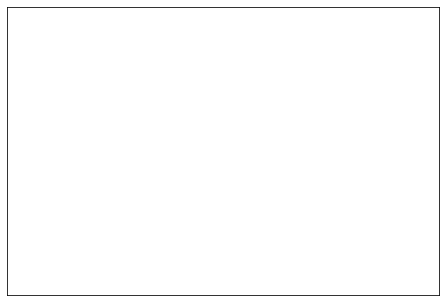

In [136]:
a = nx.DiGraph()

a.add_nodes_from([1,2])
a.add_weighted_edges_from([(1,2,reverse(0.4)),
                           (2,1,0.3)])

nx.draw(a, with_labels = True)

- 이유는 모르겠지만 함수가 작동하지 않는다.

In [7]:
print(reverse(0.8),reverse(0.6),reverse(0.9),reverse(0.5),reverse(0.8),reverse(0.3),reverse(0.95))

1.25
1.67
1.11
2.0
1.25
3.33
1.05
None None None None None None None


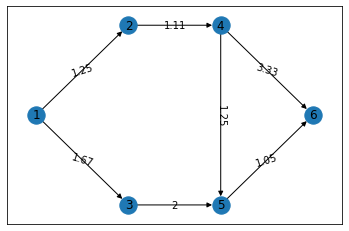

In [9]:
import networkx as nx

e = nx.DiGraph()

e.add_nodes_from([1,2,3,4,5,6])

e.add_weighted_edges_from([(1,2,1.25),
                           (1,3,1.67),
                           (2,4,1.11),
                           (3,5,2),
                           (4,5,1.25),
                           (4,6,3.33),
                           (5,6,1.05)
                           ])

fixed_layout = {1:[0,0.5],
                2:[1,1],
                3:[1,0],
                4:[2,1],
                5:[2,0],
                6:[3,0.5]}

# edge weight labels
edge_labels = nx.get_edge_attributes(e, 'weight')
nx.draw_networkx_edge_labels(e, pos = fixed_layout, edge_labels=edge_labels)
nx.draw_networkx(e, pos = fixed_layout)

In [17]:
print(nx.shortest_path(e,1,6,weight = 'weight'),nx.shortest_path_length(e,1,6, weight='weight'))

[1, 2, 4, 5, 6] 4.66


### 문제 2.22 - 2.24

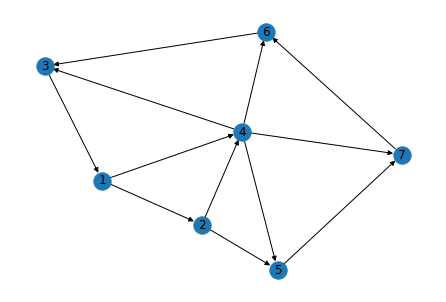

In [18]:
f = nx.DiGraph()

f.add_nodes_from([1,2,3,4,5,6,7])
f.add_edges_from([(1,2,),
                  (1,4),
                  (2,4),
                  (2,5),
                  (3,1),
                  (4,3),
                  (4,5),
                  (4,6),
                  (4,7),
                  (5,7),
                  (6,3),
                  (7,6)])

nx.draw(f, with_labels = True)

In [22]:
print(nx.is_weakly_connected(f), nx.diameter(f))

True 5


### 문제 2.32

1.0

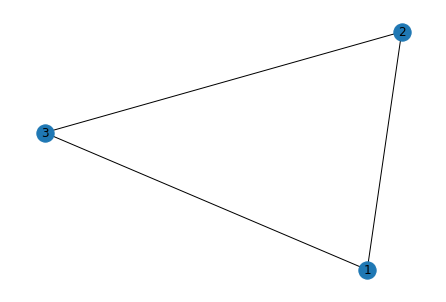

In [25]:
g = nx.Graph()

g.add_nodes_from([1,2,3])

g.add_edges_from([(1,2),(2,3),(3,1)])

nx.draw(g, with_labels = True)


In [29]:
print(nx.clustering(g))

{1: 1.0, 2: 1.0, 3: 1.0}


### 문제 2.34

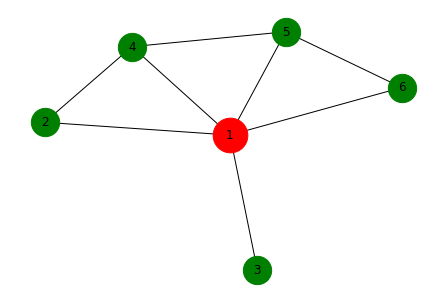

In [32]:
a = nx.Graph()
a.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),
                  (2,4),
                  (4,5),
                  (5,6)])

ego = 1
pos = nx.spring_layout(a)

nx.draw(a, pos, node_color = 'green',
        node_size = 800, with_labels = True)

options = {"node_size":1200, "node_color":"r"}
nx.draw_networkx_nodes(a, pos, nodelist=[ego],**options)
plt.show()

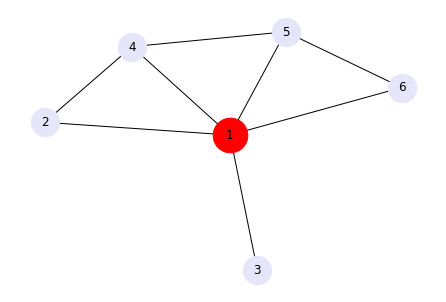

In [33]:
hub_ego = nx.ego_graph(a,ego)

nx.draw(hub_ego, pos, node_color = 'lavender',
        node_size = 800, with_labels = True)

nx.draw_networkx_nodes(
    hub_ego, pos, nodelist=[ego], **options
)

plt.show()

In [36]:
print(nx.clustering(a,1), nx.clustering(hub_ego,1))

0.3 0.3


### 문제 2.34 - 2.35

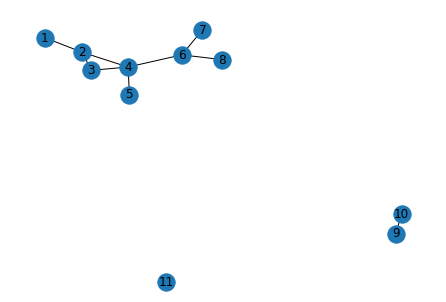

In [40]:
b = nx.Graph()

b.add_node(11)

b.add_edges_from([(1,2),
                  (2,3),(2,4),
                  (3,4),
                  (4,5),(4,6),
                  (6,7),(6,8),
                  (9,10)
                  ])

nx.draw(b, with_labels = True)

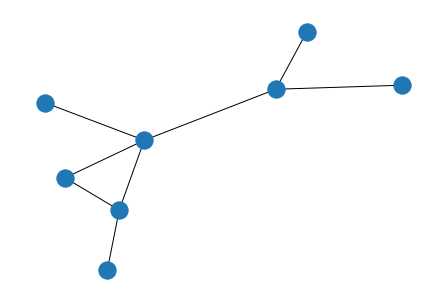

In [43]:
comps = sorted(nx.connected_components(b), key = len, reverse=True)
giant = comps[0]
ac = nx.subgraph(b, giant)

nx.draw(ac)

In [49]:
list(nx.shortest_path_length(ac))

[(1, {1: 0, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 8: 4, 7: 4}),
 (2, {2: 0, 1: 1, 3: 1, 4: 1, 5: 2, 6: 2, 8: 3, 7: 3}),
 (3, {3: 0, 2: 1, 4: 1, 1: 2, 5: 2, 6: 2, 8: 3, 7: 3}),
 (4, {4: 0, 2: 1, 3: 1, 5: 1, 6: 1, 1: 2, 7: 2, 8: 2}),
 (5, {5: 0, 4: 1, 2: 2, 3: 2, 6: 2, 1: 3, 7: 3, 8: 3}),
 (6, {6: 0, 8: 1, 4: 1, 7: 1, 2: 2, 3: 2, 5: 2, 1: 3}),
 (7, {7: 0, 6: 1, 8: 2, 4: 2, 2: 3, 3: 3, 5: 3, 1: 4}),
 (8, {8: 0, 6: 1, 4: 2, 7: 2, 2: 3, 3: 3, 5: 3, 1: 4})]

In [50]:
nx.clustering(ac)

{1: 0,
 2: 0.3333333333333333,
 3: 1.0,
 4: 0.16666666666666666,
 5: 0,
 6: 0,
 7: 0,
 8: 0}

### 문제 2.37 - 2.38